<a href="https://colab.research.google.com/github/huramire/PyoyectoBanco2022/blob/main/ProyectoCedesistemasSerieFinancieraGOOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Librerias**

In [1]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime
import plotly.express as px
import pandas_datareader as wb

#**Traer Información**

In [3]:
today =  datetime.today().strftime("%Y-%m-%d")
today

'2022-07-22'

In [4]:
inicio="2017-01-01"
ticker="GOOG"
df= wb.DataReader(ticker,"yahoo",inicio,today)

In [5]:
df.shape

(1398, 6)

#**Filtros**

In [6]:
df.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,39.481499,38.790001,38.940498,39.306999,33146000.0,39.306999
2017-01-04,39.567001,39.158001,39.417999,39.345001,21460000.0,39.345001


In [7]:
df["2016":"2017"]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,39.481499,38.790001,38.940498,39.306999,33146000.0,39.306999
2017-01-04,39.567001,39.158001,39.417999,39.345001,21460000.0,39.345001
2017-01-05,39.723999,39.250999,39.304001,39.701000,26704000.0,39.701000
2017-01-06,40.395000,39.610199,39.763000,40.307499,32804000.0,40.307499
2017-01-09,40.498299,40.141499,40.320000,40.332500,25492000.0,40.332500
...,...,...,...,...,...,...
2017-12-22,53.209999,52.972000,53.055500,53.006001,15102000.0,53.006001
2017-12-26,53.006001,52.509998,52.903500,52.837002,15212000.0,52.837002
2017-12-27,52.918499,52.402500,52.869499,52.468498,25438000.0,52.468498


#**Solo una fecha**

In [8]:
pd.options.display.float_format = '{:.2f}'.format
df.loc["2017-12-22"]

High              53.21
Low               52.97
Open              53.06
Close             53.01
Volume      15102000.00
Adj Close         53.01
Name: 2017-12-22 00:00:00, dtype: float64

#**Precio del cierre de mes**

In [9]:
df.asfreq("M",method="ffill")

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-31,40.06,39.53,39.84,39.84,43212000.00,39.84
2017-02-28,41.43,41.01,41.28,41.16,45216000.00,41.16
2017-03-31,41.58,41.37,41.45,41.48,28038000.00,41.48
2017-04-30,45.84,45.29,45.53,45.30,65526000.00,45.30
2017-05-31,48.96,48.01,48.75,48.24,48962000.00,48.24
...,...,...,...,...,...,...
2022-02-28,135.64,132.83,133.28,134.89,29676000.00,134.89
2022-03-31,142.64,139.62,142.45,139.65,29516000.00,139.65
2022-04-30,118.96,114.69,117.58,114.97,33694000.00,114.97


#**Días hábil**

In [10]:
df.asfreq("BM")

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-31,40.06,39.53,39.84,39.84,43212000.00,39.84
2017-02-28,41.43,41.01,41.28,41.16,45216000.00,41.16
2017-03-31,41.58,41.37,41.45,41.48,28038000.00,41.48
2017-04-28,45.84,45.29,45.53,45.30,65526000.00,45.30
2017-05-31,48.96,48.01,48.75,48.24,48962000.00,48.24
...,...,...,...,...,...,...
2022-02-28,135.64,132.83,133.28,134.89,29676000.00,134.89
2022-03-31,142.64,139.62,142.45,139.65,29516000.00,139.65
2022-04-29,118.96,114.69,117.58,114.97,33694000.00,114.97


#**Trimestrales**

In [11]:
df.asfreq("BQ")

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-31,41.58,41.37,41.45,41.48,28038000.00,41.48
2017-06-30,46.30,45.42,46.30,45.44,41804000.00,45.44
2017-09-29,47.99,47.58,47.60,47.96,31620000.00,47.96
2017-12-29,52.49,52.24,52.34,52.32,17750000.00,52.32
2018-03-30,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-29,56.41,55.75,56.00,55.78,26302000.00,55.78
2018-09-28,59.77,59.22,59.59,59.67,27612000.00,59.67
2018-12-31,52.63,51.18,52.55,51.78,29866000.00,51.78
2019-03-29,58.95,58.14,58.74,58.67,25398000.00,58.67


#**Gráfico Sencillo**

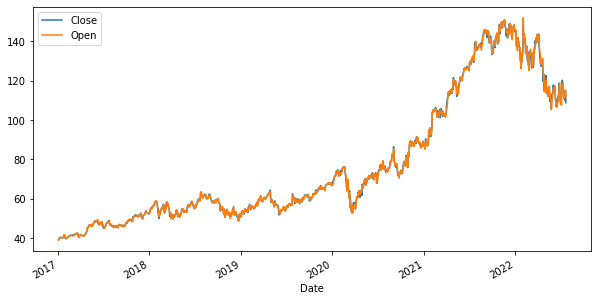

In [12]:
df[["Close","Open"]].plot(figsize=(10,5))
plt.show()

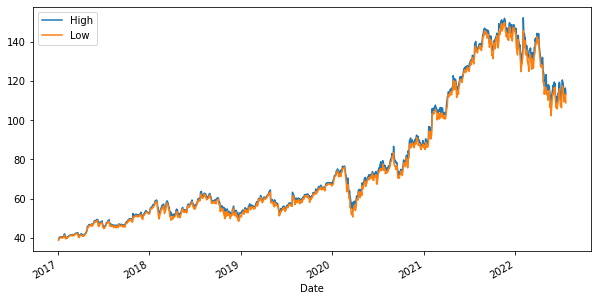

In [13]:
df[["High","Low"]].plot(figsize=(10,5))
plt.show()

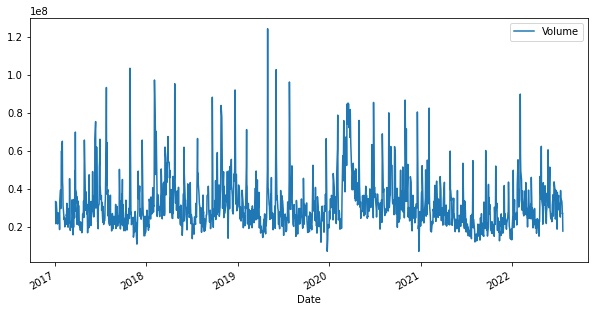

In [14]:
df[["Volume"]].plot(figsize=(10,5))
plt.show()

#**Retornos Financieros**

In [15]:

VariacionDiaria=df["Close"]/df["Close"].shift(1)-1

In [16]:
df["Retornos"]=VariacionDiaria

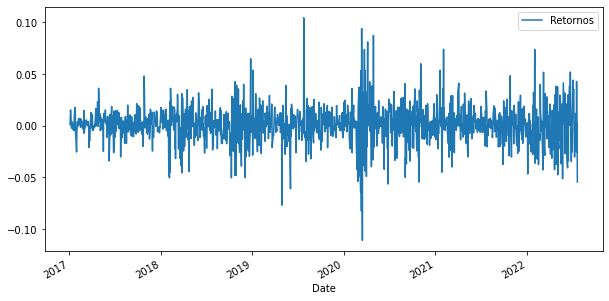

In [17]:
df[["Retornos"]].plot(figsize=(10,5))
plt.show()

In [18]:
df[["Retornos"]].describe()

,Retornos
count,1397.00
mean,0.00
std,0.02
min,-0.11
25%,-0.01
50%,0.00
75%,0.01
max,0.10


#**Grafica con Plotly**

In [19]:
fig=px.line(df,y="Close",title="Evolución Diaria Precio de Acción de Apple")
fig.update_xaxes(rangeslider_visible=True)
## Botones
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [20]:
import statsmodels.api as sm 
from pylab import rcParams

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



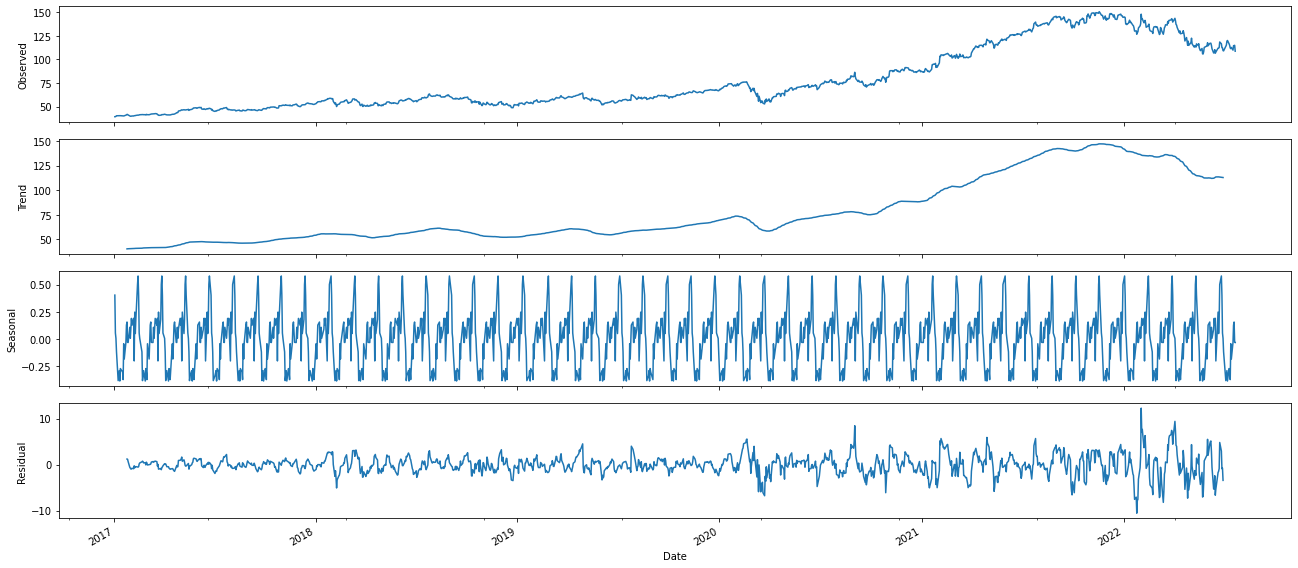

In [21]:
rcParams["figure.figsize"]=18,8
descomposicion= sm.tsa.seasonal_decompose(df["Close"],model="additive",freq=30)
fig = descomposicion.plot()

#**Dia Semana, Dia mes, Year**

In [22]:
df.head(2)

,High,Low,Open,Close,Volume,Adj Close,Retornos
Date,,,,,,,
2017-01-03,39.48,38.79,38.94,39.31,33146000.00,39.31,NaN
2017-01-04,39.57,39.16,39.42,39.35,21460000.00,39.35,0.00


In [23]:
df["Fecha"]=df.index

In [24]:
df.head(6)

,High,Low,Open,Close,Volume,Adj Close,Retornos,Fecha
Date,,,,,,,,
2017-01-03,39.48,38.79,38.94,39.31,33146000.00,39.31,NaN,2017-01-03
2017-01-04,39.57,39.16,39.42,39.35,21460000.00,39.35,0.00,2017-01-04
2017-01-05,39.72,39.25,39.30,39.70,26704000.00,39.70,0.01,2017-01-05
2017-01-06,40.40,39.61,39.76,40.31,32804000.00,40.31,0.02,2017-01-06
2017-01-09,40.50,40.14,40.32,40.33,25492000.00,40.33,0.00,2017-01-09
2017-01-10,40.46,40.18,40.39,40.24,23536000.00,40.24,-0.00,2017-01-10


In [25]:
# Dia semana
dw_mapping={
    0: 'Lunes', 
    1: 'Martes', 
    2: 'Miércoles', 
    3: 'Jueves', 
    4: 'Viernes',
    5: 'Sábado', 
    6: 'Domingo'}
df["DiaSemana"]=df.Fecha.dt.weekday.map(dw_mapping)

In [26]:

## Mes
dw_mapping={
    "01": 'Enero', 
    "02": 'Febrero', 
    "03": 'Marzo', 
    "04": 'Abril', 
    "05": 'Mayo',
    "06": 'Junio', 
    "07": 'Julio',
    "08": "Agosto",
    "09": "Septiembre",
    "10": "Octubre",
    "11":"Noviembre",
    "12": "Noviembre"}
df["Mes"]=df.Fecha.dt.strftime('%m').map(dw_mapping)

#**Modelo Mensual**

In [27]:
y=df["Close"].resample("M").mean()

In [28]:
y

Date
2017-01-31    40.40
2017-02-28    40.85
2017-03-31    41.71
2017-04-30    42.20
2017-05-31    46.96
              ...  
2022-03-31   135.36
2022-04-30   128.61
2022-05-31   113.53
2022-06-30   112.83
2022-07-31   113.90
Freq: M, Name: Close, Length: 67, dtype: float64

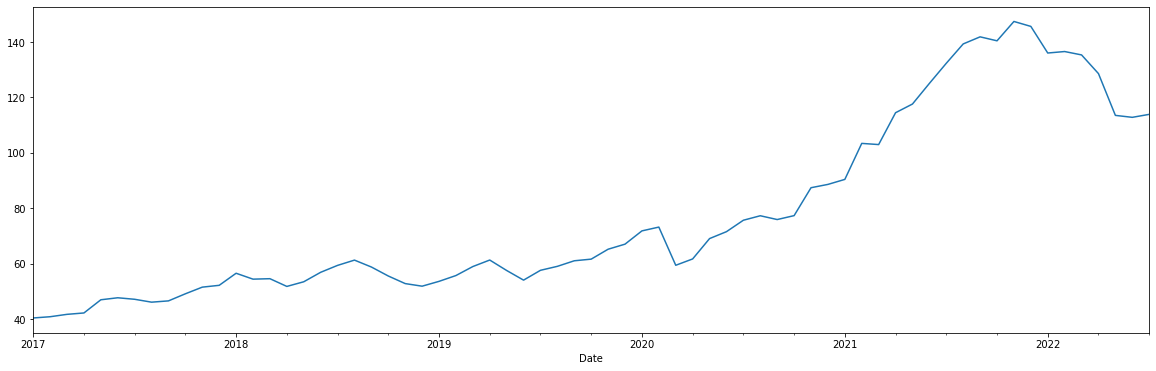

In [29]:
y.plot(figsize=(20,6))
plt.show()

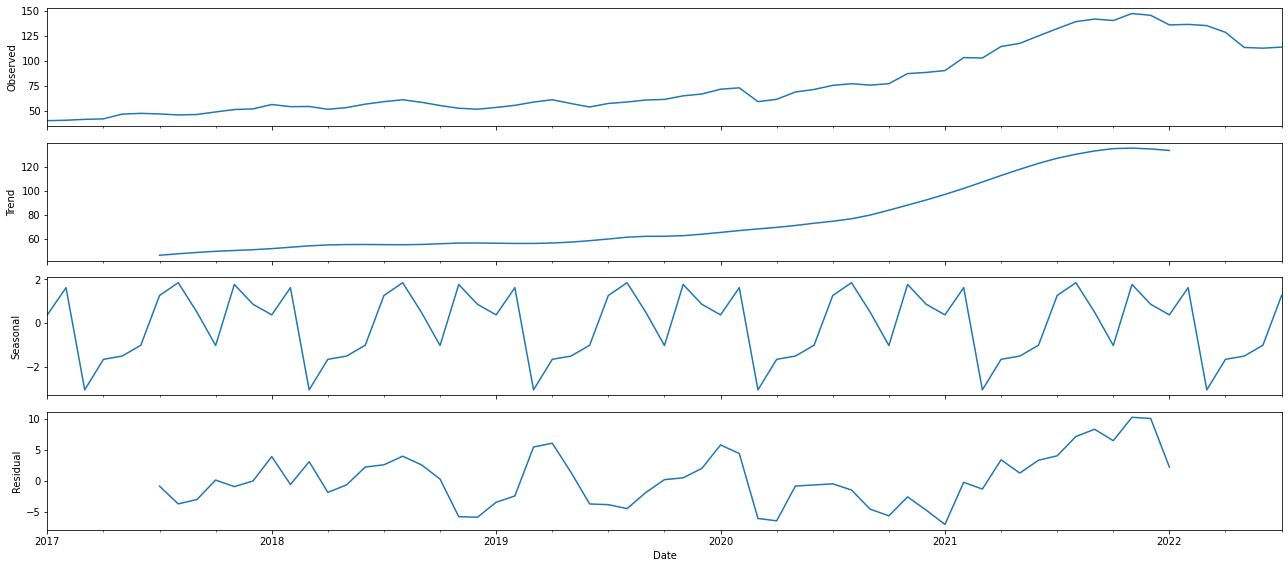

In [30]:
rcParams["figure.figsize"]=18,8
descomponer=sm.tsa.seasonal_decompose(y,model="additive")
fig=descomponer.plot()

#**Suponer que es un SARIMA**

In [31]:
def Optimizacion_SARIMA(y):
  import itertools
  p=d=q=range(0,2)
  pdq=list(itertools.product(p,d,q))

  seasonal_pdq=[(x[0],x[1],x[2],12) for x in list(itertools.product(p,q,d))]

  p1=[]
  p2=[]
  p3=[]

  for param in pdq:
      for param_seasonal in seasonal_pdq:
          try:
              mod=sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
              results=mod.fit()
              p1.append(param)
              p2.append(param_seasonal)
              p3.append(results.aic)
          except:
              continue
  df1 = pd.DataFrame({'param' : p1, 'param_seasonal' :p2,"results.aic":p3})
  td=df1[df1["results.aic"]==min(p3)]
  return td

#**Entrenar el Modelo**

##**Dividir en Train y Test**

In [32]:

y=df["Close"].resample("M").mean()

In [33]:
y

Date
2017-01-31    40.40
2017-02-28    40.85
2017-03-31    41.71
2017-04-30    42.20
2017-05-31    46.96
              ...  
2022-03-31   135.36
2022-04-30   128.61
2022-05-31   113.53
2022-06-30   112.83
2022-07-31   113.90
Freq: M, Name: Close, Length: 67, dtype: float64

##**Train**

In [34]:
y_train=y["2017-01-31":"2021-06-30"]
y_train

Date
2017-01-31    40.40
2017-02-28    40.85
2017-03-31    41.71
2017-04-30    42.20
2017-05-31    46.96
2017-06-30    47.69
2017-07-31    47.14
2017-08-31    46.10
2017-09-30    46.56
2017-10-31    49.13
2017-11-30    51.52
2017-12-31    52.18
2018-01-31    56.54
2018-02-28    54.41
2018-03-31    54.57
2018-04-30    51.78
2018-05-31    53.46
2018-06-30    56.88
2018-07-31    59.38
2018-08-31    61.28
2018-09-30    58.79
2018-10-31    55.55
2018-11-30    52.81
2018-12-31    51.87
2019-01-31    53.61
2019-02-28    55.71
2019-03-31    58.96
2019-04-30    61.31
2019-05-31    57.54
2019-06-30    54.06
2019-07-31    57.60
2019-08-31    59.03
2019-09-30    61.04
2019-10-31    61.64
2019-11-30    65.21
2019-12-31    67.04
2020-01-31    71.83
2020-02-29    73.21
2020-03-31    59.42
2020-04-30    61.71
2020-05-31    69.06
2020-06-30    71.55
2020-07-31    75.68
2020-08-31    77.30
2020-09-30    75.93
2020-10-31    77.34
2020-11-30    87.42
2020-12-31    88.61
2021-01-31    90.42
2021-02-28   10

In [35]:
y_test=y["2021-07-31":]
y_test

Date
2021-07-31   132.34
2021-08-31   139.32
2021-09-30   141.88
2021-10-31   140.45
2021-11-30   147.43
2021-12-31   145.65
2022-01-31   136.04
2022-02-28   136.58
2022-03-31   135.36
2022-04-30   128.61
2022-05-31   113.53
2022-06-30   112.83
2022-07-31   113.90
Freq: M, Name: Close, dtype: float64

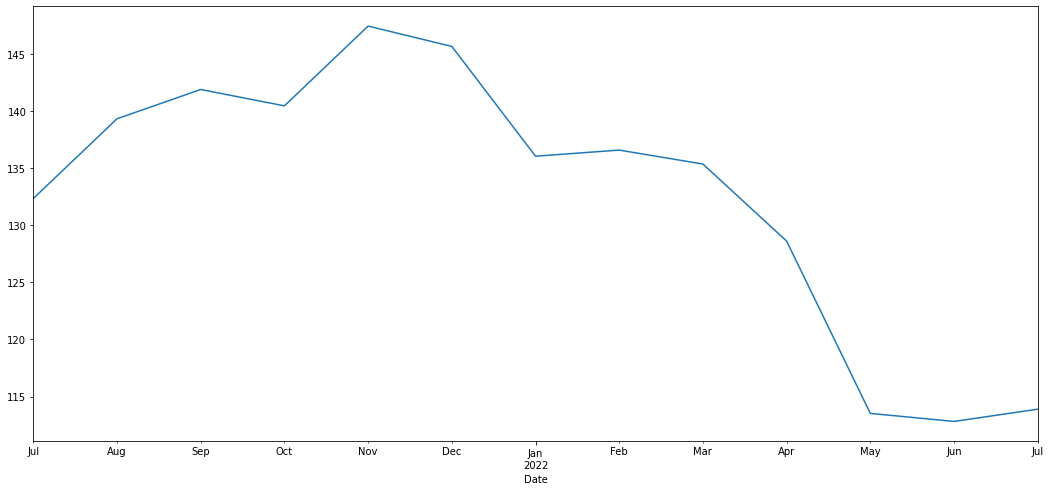

In [36]:
y_test.plot()
plt.show()

#**Training Precio Acción**

In [37]:
Optimizacion_SARIMA(y_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dis

,param,param_seasonal,results.aic
47,"(1, 0, 1)","(1, 1, 1, 12)",177.63


In [38]:
mododelo_Accion=sm.tsa.statespace.SARIMAX(y_train,
                              order=(1,0,1),
                              seasonal_order=(1,1,1,12),
                              enforce_stationarity=False,
                              enforce_invertibility=False)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1080      0.032     35.170      0.000       1.046       1.170
ma.L1         -0.3662      0.243     -1.507      0.132      -0.843       0.110
ar.S.L12      -0.6554      0.267     -2.452      0.014      -1.179      -0.131
ma.S.L12      -0.1962      0.477     -0.411      0.681      -1.131       0.739
sigma2        22.9335      4.862      4.717      0.000      13.403      32.464


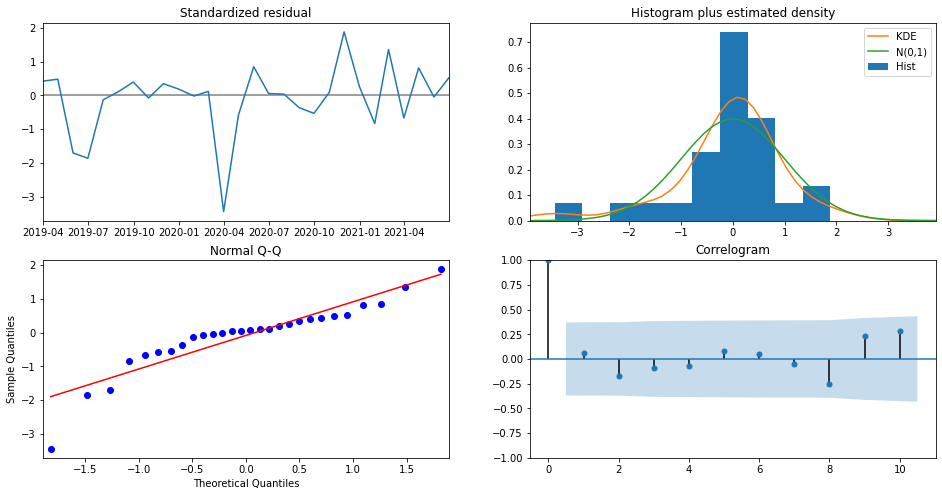

In [39]:
resultados=mododelo_Accion.fit()
print(resultados.summary().tables[1])
resultados.plot_diagnostics(figsize=(16,8))
plt.show()

**Evaluacion Training**

In [40]:
pred=resultados.get_prediction(start=pd.to_datetime("2017-01-31"),dynamic=False)

In [41]:
y_train

Date
2017-01-31    40.40
2017-02-28    40.85
2017-03-31    41.71
2017-04-30    42.20
2017-05-31    46.96
2017-06-30    47.69
2017-07-31    47.14
2017-08-31    46.10
2017-09-30    46.56
2017-10-31    49.13
2017-11-30    51.52
2017-12-31    52.18
2018-01-31    56.54
2018-02-28    54.41
2018-03-31    54.57
2018-04-30    51.78
2018-05-31    53.46
2018-06-30    56.88
2018-07-31    59.38
2018-08-31    61.28
2018-09-30    58.79
2018-10-31    55.55
2018-11-30    52.81
2018-12-31    51.87
2019-01-31    53.61
2019-02-28    55.71
2019-03-31    58.96
2019-04-30    61.31
2019-05-31    57.54
2019-06-30    54.06
2019-07-31    57.60
2019-08-31    59.03
2019-09-30    61.04
2019-10-31    61.64
2019-11-30    65.21
2019-12-31    67.04
2020-01-31    71.83
2020-02-29    73.21
2020-03-31    59.42
2020-04-30    61.71
2020-05-31    69.06
2020-06-30    71.55
2020-07-31    75.68
2020-08-31    77.30
2020-09-30    75.93
2020-10-31    77.34
2020-11-30    87.42
2020-12-31    88.61
2021-01-31    90.42
2021-02-28   10

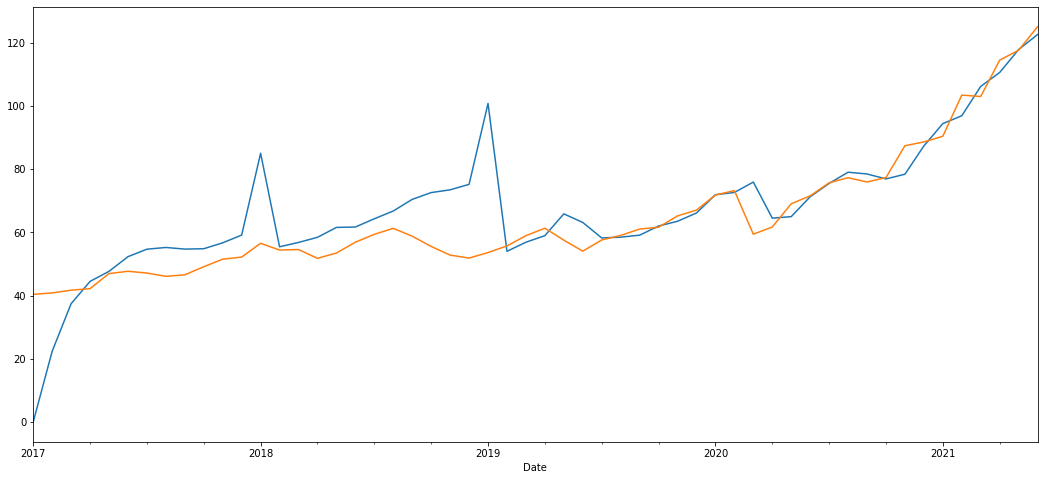

In [42]:
pred.predicted_mean.plot()
y_train.plot()

In [43]:

Resultado_train=pd.concat([pd.DataFrame(y_train),pd.DataFrame(pred.predicted_mean)],axis=1)

In [44]:
Resultado_train.head()

,Close,0
Date,,
2017-01-31,40.40,0.00
2017-02-28,40.85,22.38
2017-03-31,41.71,37.43
2017-04-30,42.20,44.49
2017-05-31,46.96,47.67


In [45]:
Resultado_train.columns=["Real","Pronostico"]

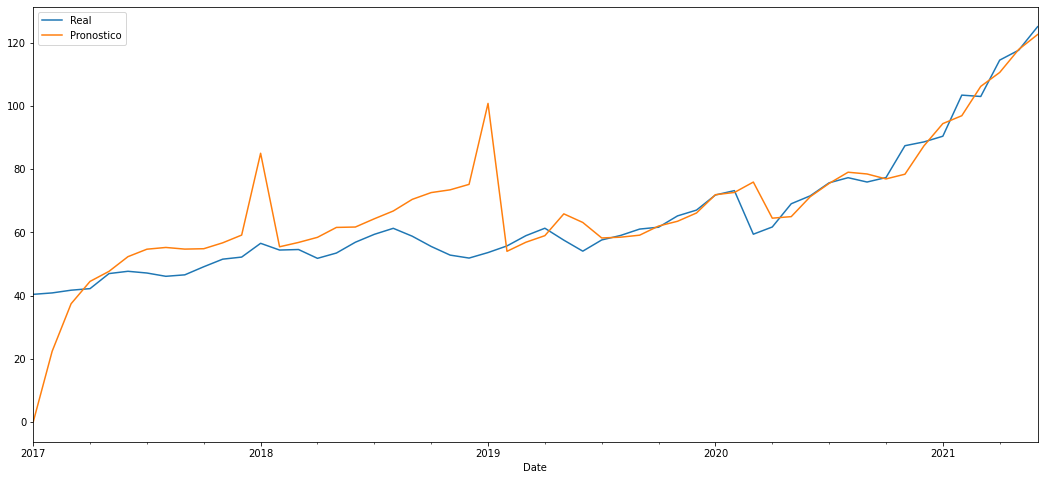

In [46]:
Resultado_train.plot()
plt.show()

#**Métricas de Error**

##**MAPE: error porcentual absoluto medio**

El error porcentual absoluto medio (MAPE) expresa la exactitud como un porcentaje del error. Debido a que el MAPE es un porcentaje, puede ser más fácil de entender que otros estadísticos de medición de exactitud. Por ejemplo, si el MAPE es 5, en promedio, el pronóstico está errado en un 5%.

Sin embargo, es posible que algunas veces observe un valor de MAPE muy elevado aunque el modelo parezca ajustarse a los datos adecuadamente. Examine la gráfica para ver si los valores de los datos se aproximan a 0. Debido a que MAPE divide el error absoluto entre los datos reales, los valores que se aproximan a 0 pueden aumentar significativamente el MAPE.

##**RMSE**

El error cuadrático medio (RMSE) es una métrica que nos dice qué tan lejos están nuestros valores predichos de nuestros valores observados en un modelo, en promedio

##**MAE**

Mide la magnitud promedio de los errores en un conjunto de pronósticos, sin considerar su dirección. Mide la precisión de las variables continuas. Expresado en palabras, el MAE es el promedio sobre la muestra de verificación de los valores absolutos de las diferencias entre el pronóstico y la observación correspondiente. El MAE es una puntuación lineal, lo que significa que todas las diferencias individuales se ponderan por igual en la media.

In [47]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

from sklearn.metrics import mean_absolute_error as MAE

def rmse (actual, pred):
    actual, pred = np.array (actual), np.array (pred)
    return np.sqrt (np.square (np.subtract (actual, pred)). mean ())

In [48]:
Actual=Resultado_train.Real
Prediccion=Resultado_train.Pronostico
MapeTrain=MAPE(Actual,Prediccion)
print(MapeTrain)
RMSETrain=rmse(Actual,Prediccion)
print(RMSETrain)
MaeTrain=MAE(Actual,Prediccion)
print(MaeTrain)

13.359445473420523
11.872759554500483
7.117959255946836


#**Evaluación Pronostico a 12 Meses**

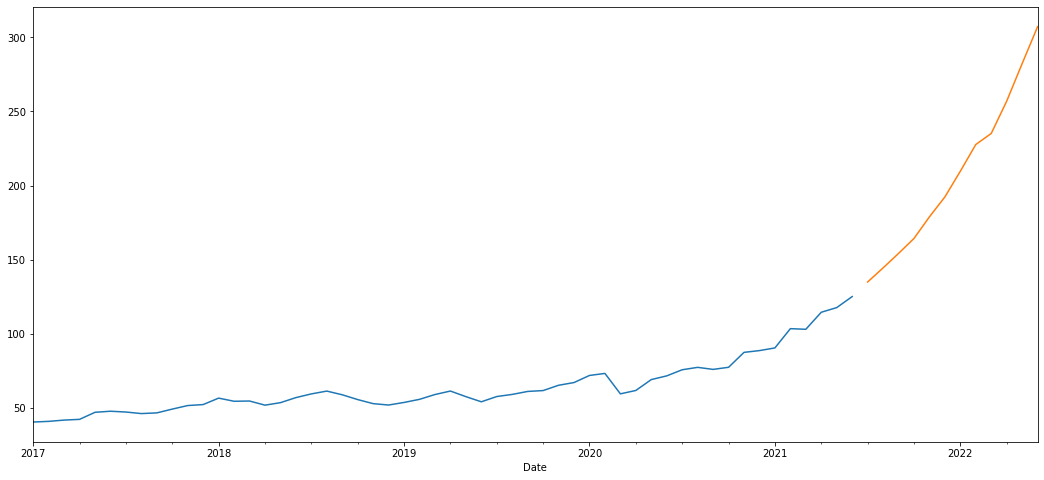

In [49]:
Pred_uc=resultados.get_forecast(steps=12)
y_train.plot(label="Observado")
Pred_uc.predicted_mean.plot()

In [50]:
y_train

Date
2017-01-31    40.40
2017-02-28    40.85
2017-03-31    41.71
2017-04-30    42.20
2017-05-31    46.96
2017-06-30    47.69
2017-07-31    47.14
2017-08-31    46.10
2017-09-30    46.56
2017-10-31    49.13
2017-11-30    51.52
2017-12-31    52.18
2018-01-31    56.54
2018-02-28    54.41
2018-03-31    54.57
2018-04-30    51.78
2018-05-31    53.46
2018-06-30    56.88
2018-07-31    59.38
2018-08-31    61.28
2018-09-30    58.79
2018-10-31    55.55
2018-11-30    52.81
2018-12-31    51.87
2019-01-31    53.61
2019-02-28    55.71
2019-03-31    58.96
2019-04-30    61.31
2019-05-31    57.54
2019-06-30    54.06
2019-07-31    57.60
2019-08-31    59.03
2019-09-30    61.04
2019-10-31    61.64
2019-11-30    65.21
2019-12-31    67.04
2020-01-31    71.83
2020-02-29    73.21
2020-03-31    59.42
2020-04-30    61.71
2020-05-31    69.06
2020-06-30    71.55
2020-07-31    75.68
2020-08-31    77.30
2020-09-30    75.93
2020-10-31    77.34
2020-11-30    87.42
2020-12-31    88.61
2021-01-31    90.42
2021-02-28   10

In [51]:
Pred_uc.predicted_mean

2021-07-31   134.91
2021-08-31   144.43
2021-09-30   154.19
2021-10-31   164.30
2021-11-30   178.88
2021-12-31   192.33
2022-01-31   209.69
2022-02-28   227.70
2022-03-31   235.17
2022-04-30   256.98
2022-05-31   282.32
2022-06-30   307.24
Freq: M, dtype: float64

#**Comparar Real con Pronostico**

In [52]:
y_test

Date
2021-07-31   132.34
2021-08-31   139.32
2021-09-30   141.88
2021-10-31   140.45
2021-11-30   147.43
2021-12-31   145.65
2022-01-31   136.04
2022-02-28   136.58
2022-03-31   135.36
2022-04-30   128.61
2022-05-31   113.53
2022-06-30   112.83
2022-07-31   113.90
Freq: M, Name: Close, dtype: float64

In [53]:
Resultado_test=pd.concat([pd.DataFrame(y_test),pd.DataFrame(Pred_uc.predicted_mean)],axis=1)
Resultado_test.columns=["Real","Pronostico"]

In [54]:
Resultado_test

,Real,Pronostico
2021-07-31,132.34,134.91
2021-08-31,139.32,144.43
2021-09-30,141.88,154.19
2021-10-31,140.45,164.30
2021-11-30,147.43,178.88
2021-12-31,145.65,192.33
2022-01-31,136.04,209.69
2022-02-28,136.58,227.70
2022-03-31,135.36,235.17
2022-04-30,128.61,256.98


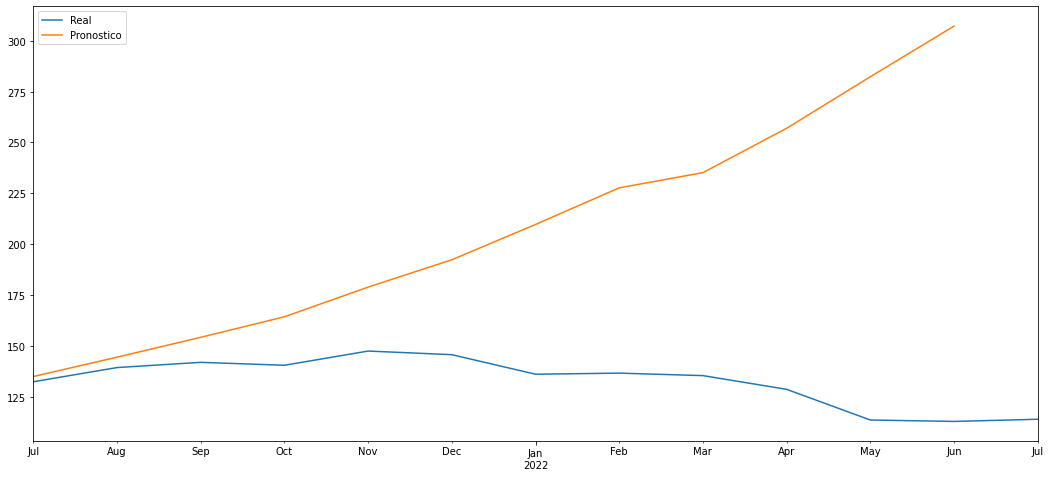

In [55]:
Resultado_test.plot()
plt.show()

#**Error Test**

In [56]:
Actual=Resultado_test.Real
Prediccion=Resultado_test.Pronostico
MapeTest=MAPE(Actual,Prediccion)
print("MAPE: ",MapeTest)
RMSETest=rmse(Actual,Prediccion)
print("RMSE" ,RMSETest)
MaeTest=MAE(Actual,Prediccion)
print("MAE: ", MaeTest)

MAPE:  58.336619366749396
RMSE nan


ValueError: ignored

#**Con Todos los datos**

In [57]:

#Optimizacion_SARIMA(y)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9795      0.038     25.476      0.000       0.904       1.055
ma.L1          0.3666      0.184      1.992      0.046       0.006       0.727
ar.S.L12       0.0002      0.223      0.001      0.999      -0.438       0.438
ma.S.L12      -0.6515      0.460     -1.417      0.157      -1.553       0.250
sigma2        33.0148     12.100      2.729      0.006       9.299      56.730


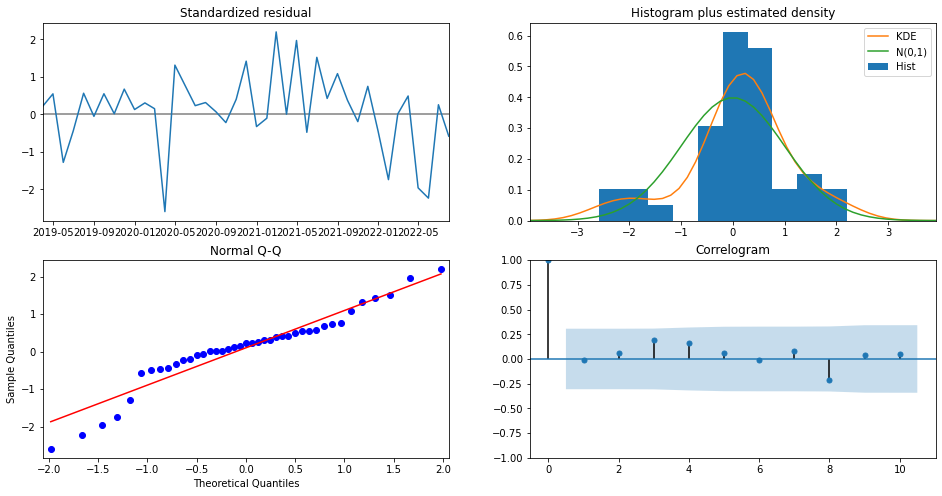

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2022-08-31 to 2023-07-31
Freq: M
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Proyeccion  12 non-null     float64
dtypes: float64(1)
memory usage: 192.0 bytes
            Proyeccion
2022-08-31      115.42
2022-09-30      115.59
2022-10-31      114.90
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 67 entries, 2017-01-31 to 2022-07-31
Freq: M
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Proyeccion  67 non-null     float64
dtypes: float64(1)
memory usage: 3.1 KB
            Proyeccion
Date                  
2017-01-31       40.40
2017-02-28       40.85
2017-03-31       41.71


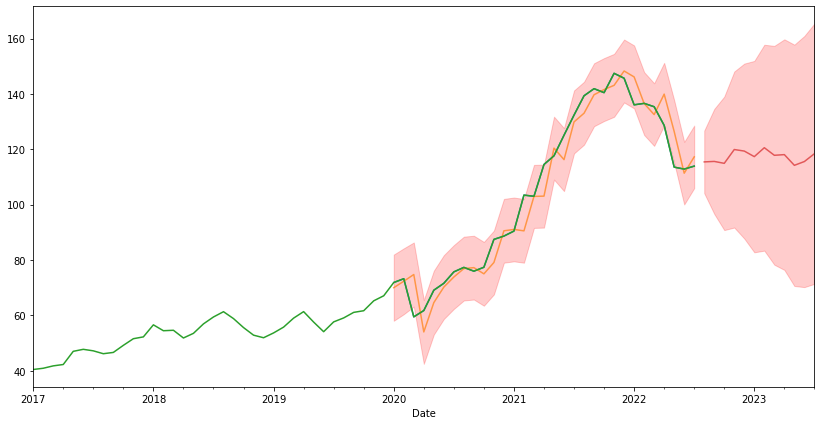

In [58]:
mod=sm.tsa.statespace.SARIMAX(y,
                              order=(1,0,1),
                              seasonal_order=(1,1,1,12),
                              enforce_stationarity=False,
                              enforce_invertibility=False)

resultados=mod.fit()
print(resultados.summary().tables[1])
resultados.plot_diagnostics(figsize=(16,8))
plt.show()

pred=resultados.get_prediction(start=pd.to_datetime("2020-01-31"),dynamic=False)
pred_ci=pred.conf_int()
ax=y["2020":].plot(label="Observado")
pred.predicted_mean.plot(ax=ax,label="Prediccion",alpha=.7,figsize=(14,7))
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],color="r",alpha=.2)

Pred_uc=resultados.get_forecast(steps=12)
pred_ci=Pred_uc.conf_int()
ax=y.plot(label="Observado")
Pred_uc.predicted_mean.plot(ax=ax,label="Prediccion",alpha=.7,figsize=(14,7))
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],color="r",alpha=.2)

proy = Pred_uc.predicted_mean
proy = pd.DataFrame(proy)
proy.columns = ['Proyeccion']
proy.info()
print(proy.head(3))

## Valores reales
y_truth = y
proy1 = pd.DataFrame(y_truth)
proy1.columns = ['Proyeccion']
proy1.info()
print(proy1.head(3))

data = pd.concat([proy1,proy])
data.tail(13)

fig=px.line(data,y="Proyeccion",title="Evolución Diaria Precio de Acción de Apple")
## Botones
fig.show()

In [ ]:
data.to_excel("PronosticoAPPl.xlsx")